<Figure size 640x480 with 0 Axes>

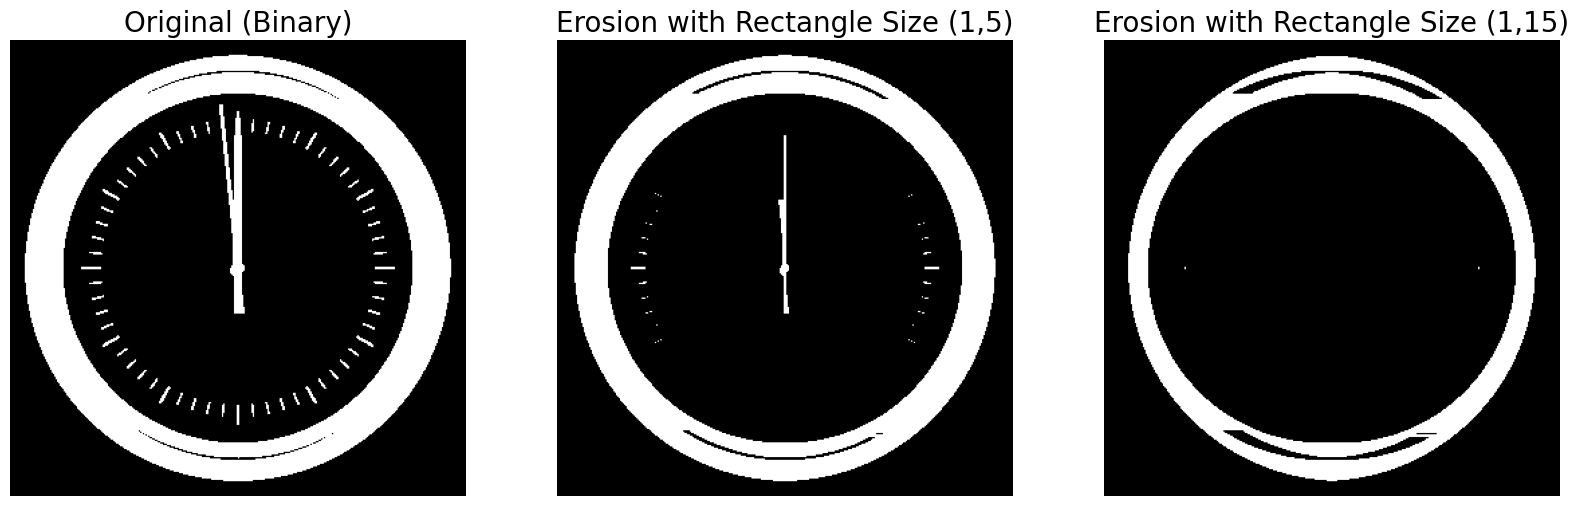

In [2]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle

# Hàm để hiển thị ảnh với tiêu đề tùy chọn
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off')  # Tắt trục tọa độ

# Đọc ảnh từ đường dẫn và chuyển đổi sang ảnh xám
im = rgb2gray(imread('images/clock2.jpg'))

# Chuyển đổi ảnh xám thành ảnh nhị phân bằng cách áp dụng ngưỡng
# Các giá trị <= 0.5 sẽ được đặt thành 0 (màu đen), > 0.5 thành 1 (màu trắng)
im[im <= 0.5] = 0
im[im > 0.5] = 1

# Đặt kiểu hiển thị ảnh là ảnh xám
pylab.gray()

# Tạo khung hình lớn để hiển thị các kết quả
pylab.figure(figsize=(20, 10))

# Hiển thị ảnh gốc đã chuyển đổi thành ảnh nhị phân
pylab.subplot(1, 3, 1)
plot_image(im, 'Original (Binary)')

# Áp dụng phép co (erosion) với cấu trúc hình chữ nhật kích thước (1,5)
# Điều này sẽ co các pixel màu trắng theo chiều ngang, loại bỏ các chi tiết mỏng
im1 = binary_erosion(im, rectangle(1, 5))
pylab.subplot(1, 3, 2)
plot_image(im1, 'Erosion with Rectangle Size (1,5)')

# Áp dụng phép co (erosion) với cấu trúc hình chữ nhật kích thước (1,15)
# Phép co mạnh hơn (kích thước lớn hơn) để loại bỏ chi tiết nhiều hơn
im1 = binary_erosion(im, rectangle(1, 15))
pylab.subplot(1, 3, 3)
plot_image(im1, 'Erosion with Rectangle Size (1,15)')

# Hiển thị tất cả các hình ảnh
pylab.show()


<Figure size 640x480 with 0 Axes>

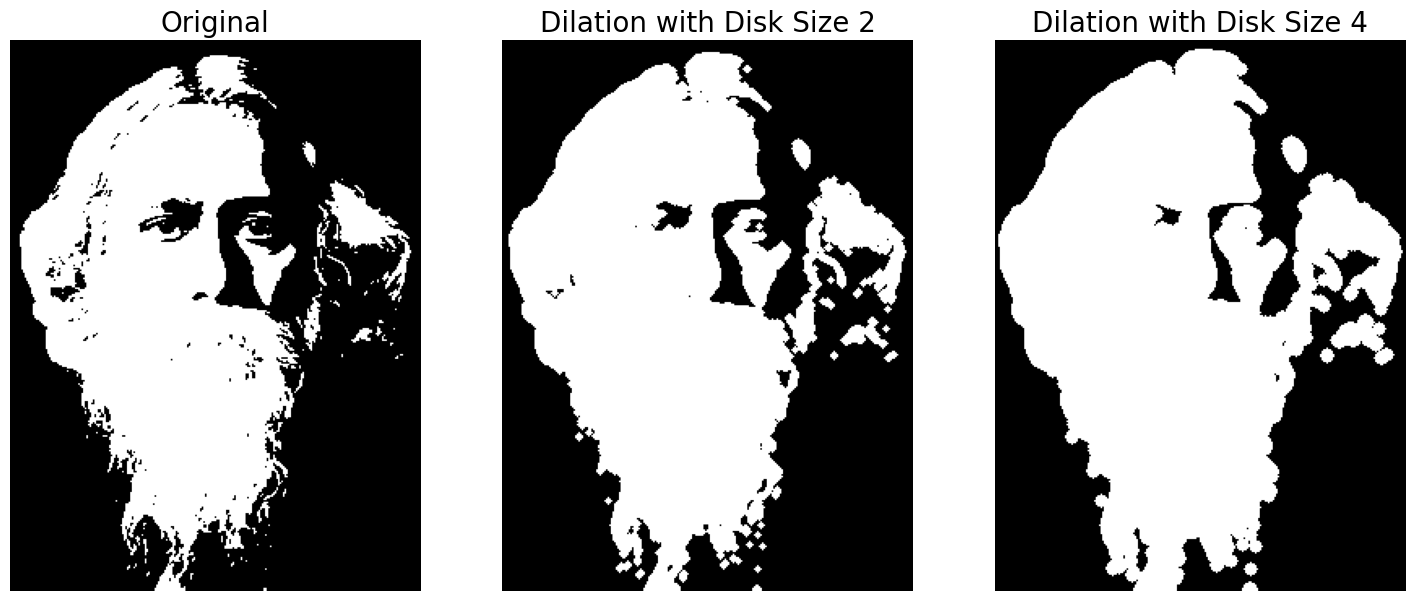

In [ ]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
from skimage.io import imread
import matplotlib.pylab as pylab

# Đọc ảnh và chuyển đổi sang kiểu float (giá trị pixel trong khoảng [0, 1])
im = img_as_float(imread('images/tagore.png'))

# Đảo ngược màu của kênh alpha (nền trong suốt) để lấy ảnh nhị phân của vùng không trong suốt
im = 1 - im[..., 3]  # Chuyển kênh alpha thành ảnh nhị phân

# Áp dụng ngưỡng để chuyển ảnh thành ảnh nhị phân (các pixel đen và trắng)
# Các giá trị <= 0.5 sẽ được đặt thành 0 (màu đen), > 0.5 thành 1 (màu trắng)
im[im <= 0.5] = 0
im[im > 0.5] = 1

# Đặt kiểu hiển thị ảnh là ảnh xám
pylab.gray()

# Tạo khung hình lớn để hiển thị các kết quả
pylab.figure(figsize=(18, 9))

# Hiển thị ảnh nhị phân gốc
pylab.subplot(131)
pylab.imshow(im)
pylab.title('Original', size=20)
pylab.axis('off')  # Tắt trục tọa độ

# Vòng lặp qua các giá trị của `d` để thực hiện phép giãn nở với các kích thước khác nhau của 
# hình tròn
for d in range(1, 3):
    # Áp dụng phép giãn nở (dilation) với cấu trúc hình tròn (disk) có bán kính 2*d
    im1 = binary_dilation(im, disk(2 * d))

    # Hiển thị ảnh sau khi giãn nở với kích thước hình tròn khác nhau
    pylab.subplot(1, 3, d + 1)
    pylab.imshow(im1)
    pylab.title('Dilation with Disk Size ' + str(2 * d), size=20)
    pylab.axis('off')  # Tắt trục tọa độ

# Hiển thị tất cả các hình ảnh
pylab.show()


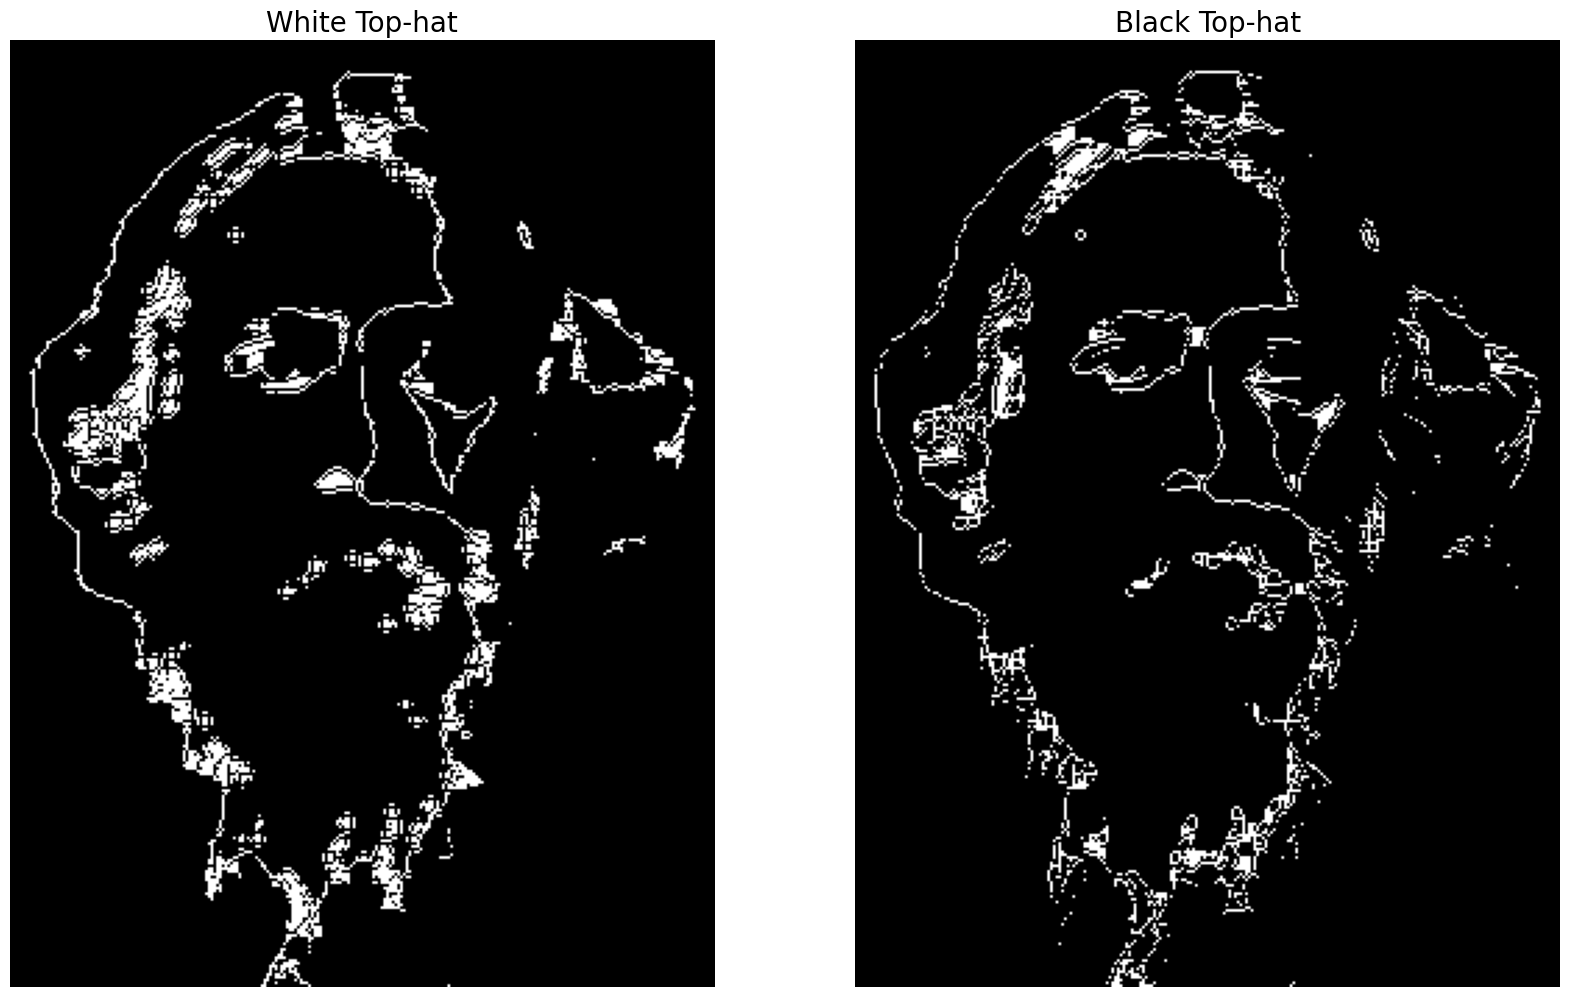

In [5]:
from skimage.morphology import white_tophat, black_tophat, square

# Đọc ảnh và lấy kênh Alpha (nền trong suốt) để tạo ảnh nhị phân của vùng không trong suốt
im = imread('images/tagore.png')[..., 3]

# Áp dụng ngưỡng để chuyển ảnh thành ảnh nhị phân (các pixel đen và trắng)
# Các giá trị <= 0.5 sẽ được đặt thành 0 (màu đen), > 0.5 thành 1 (màu trắng)
im[im <= 0.5] = 0
im[im > 0.5] = 1

# Áp dụng phép biến đổi hình thái học White Top-hat với cấu trúc hình vuông kích thước 5x5
# White Top-hat giúp tìm các vùng sáng nhỏ hơn cấu trúc đã xác định (các chi tiết sáng nhỏ)
im1 = white_tophat(im, square(5))

# Áp dụng phép biến đổi hình thái học Black Top-hat với cấu trúc hình vuông kích thước 5x5
# Black Top-hat giúp tìm các vùng tối nhỏ hơn cấu trúc đã xác định (các chi tiết tối nhỏ)
im2 = black_tophat(im, square(5))

# Tạo khung hình lớn để hiển thị các kết quả
pylab.figure(figsize=(20, 15))

# Hiển thị kết quả của phép biến đổi White Top-hat
pylab.subplot(1, 2, 1)
plot_image(im1, 'White Top-hat')

# Hiển thị kết quả của phép biến đổi Black Top-hat
pylab.subplot(1, 2, 2)
plot_image(im2, 'Black Top-hat')

# Hiển thị tất cả các hình ảnh
pylab.show()
